# Initial analysis and dataset prepation

- https://machinelearningmastery.com/difference-test-validation-datasets/

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_original = pd.read_csv("./dataset.csv")

# Normalize the data and drop the ConvexArea column (strong correlation with Area) and Extent (no difference between classes)
num_df = pd.DataFrame(
    MinMaxScaler().fit_transform(df_original.select_dtypes(include=["int64", "float64"])),
    columns=df_original.select_dtypes(include=["int64", "float64"]).columns,
).drop(columns=["ConvexArea", "Extent"], axis=1)

# Concatenate the normalized data with the categorical data
df = pd.concat([df_original.select_dtypes(include=["object"]), num_df], axis=1)

In [28]:
import umap

reducer = umap.UMAP(
    n_jobs=1, random_state=42, n_neighbors=10
)  # 10 was the best value in task 2
num_umap_df = pd.DataFrame(reducer.fit_transform(num_df))

umap_df = num_umap_df
umap_df["Class"] = df_original["Class"]

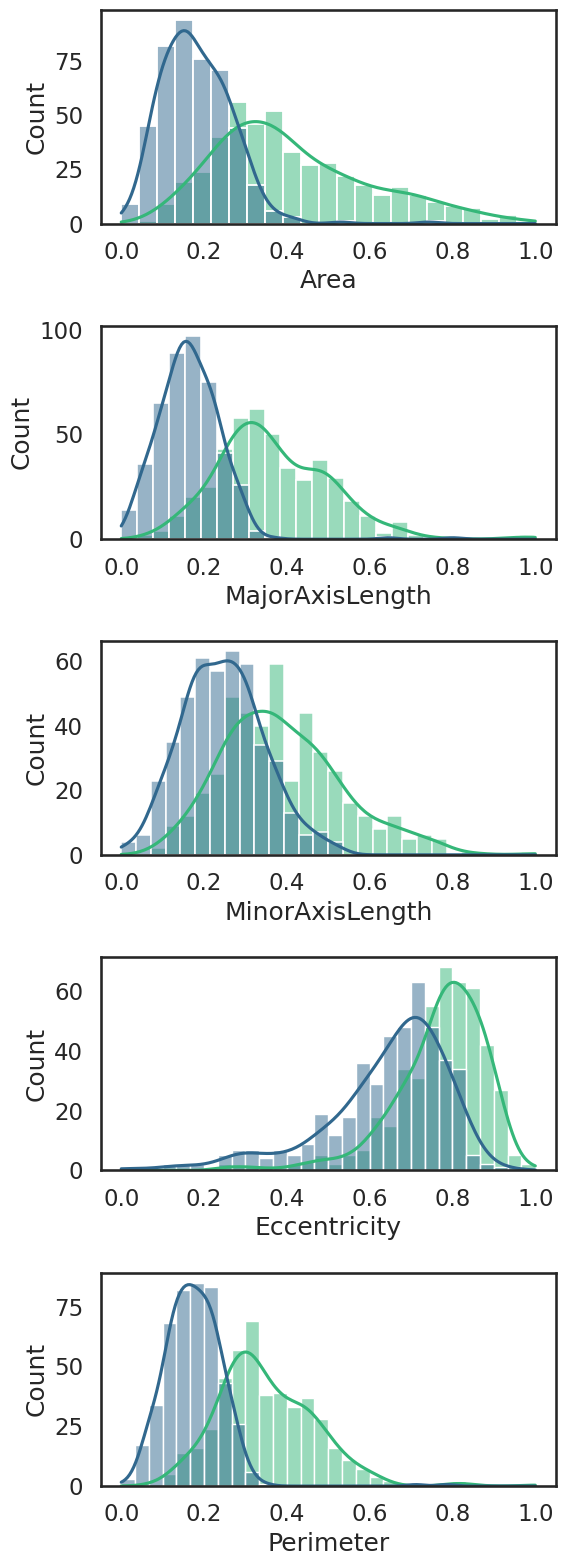

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", palette="viridis", context="talk")

fig, axs = plt.subplots(figsize=(6, 16), ncols=1, nrows=5)

for i, column in enumerate(num_df.columns):
    sns.histplot(
        data=df,
        x=column,
        hue="Class",
        palette="viridis",
        kde=True,
        ax=axs[i],
        legend=False,
    )

plt.tight_layout()
plt.show()

In [30]:
rename_map = {
    "mean": "Mean",
    "std": "Std",
    "min": "Min",
    "50%": "Med",
    "25%": "1Q",
    "75%": "3Q",
    "max": "Max",
}

for cn in ["Kecimen", "Besni"]:
    stat_df = (
        df.loc[df["Class"] == cn].describe().drop("count").T.rename(columns=rename_map)
    )

    stat_df.to_latex(
        f"./stat-{cn.lower()}.tex",
        float_format="%.3f",
        caption=f"Klasės {cn} aprašomoji statistika",
        label=f"tab:stat-{cn.lower()}",
        escape=True,
        bold_rows=True,
    )

    display(stat_df)

,Mean,Std,Min,1Q,Med,3Q,Max
Area,0.181372,0.084555,0.0,0.119619,0.171864,0.237365,0.741729
MajorAxisLength,0.164877,0.077251,0.0,0.113918,0.161475,0.213477,0.801292
MinorAxisLength,0.245698,0.097711,0.0,0.176398,0.243596,0.307187,0.525550
Eccentricity,0.641071,0.150575,0.0,0.579596,0.681033,0.738941,0.937472
Perimeter,0.175406,0.072308,0.0,0.128002,0.172636,0.218480,0.786309


,Mean,Std,Min,1Q,Med,3Q,Max
Area,0.414041,0.187112,0.073047,0.277647,0.376989,0.526072,1.0
MajorAxisLength,0.367222,0.137069,0.062902,0.273327,0.346727,0.462323,1.0
MinorAxisLength,0.389922,0.145636,0.082617,0.283820,0.371972,0.472209,1.0
Eccentricity,0.770132,0.111310,0.248227,0.716128,0.787785,0.847919,1.0
Perimeter,0.350729,0.118731,0.073471,0.270976,0.330366,0.428834,1.0


In [31]:
# First, split into training and (validation + test)
train_df, val_test_df = train_test_split(
    df, test_size=0.3, random_state=42
)  # 70% training, 30% val + test

# Now split the (validation + test) into validation and test
validation_df, test_df = train_test_split(
    val_test_df, test_size=0.5, random_state=42
)  # Splitting the 30% into two parts of 15% each

df.to_csv("./dataset-modified.csv")
train_df.to_csv("./train.csv")
validation_df.to_csv("./validation.csv")
test_df.to_csv("./test.csv")
